# ***MARKET BASKET ANALYSIS*** | *Apriori Association Rules*<br>
---
Nama  : Sri Indriawati<br>
Nim   : 211351141<br>
Kelas : Pagi A

## **Download Dataset dari Kaggle**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sriindria","key":"cc1ba50781c403abe8752a6d77f9ce5f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d henslersoftware/19560-indian-takeaway-orders

  0% 0.00/1.31M [00:00<?, ?B/s]
100% 1.31M/1.31M [00:00<00:00, 226MB/s]


In [4]:
!mkdir 19560-indian-takeaway-orders
!unzip 19560-indian-takeaway-orders.zip -d 19560-indian-takeaway-orders
!ls 19560-indian-takeaway-orders

Archive:  19560-indian-takeaway-orders.zip
  inflating: 19560-indian-takeaway-orders/restaurant-1-orders.csv  
  inflating: 19560-indian-takeaway-orders/restaurant-1-products-price.csv  
  inflating: 19560-indian-takeaway-orders/restaurant-2-orders.csv  
  inflating: 19560-indian-takeaway-orders/restaurant-2-products-price.csv  
restaurant-1-orders.csv		 restaurant-2-orders.csv
restaurant-1-products-price.csv  restaurant-2-products-price.csv


## **Library yang digunakan**

In [5]:
# INSTALL APRIORI
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=354059cb544cc0c496ba59c61175d24ea02fcd984df3590dc2de8a3f66884e8d
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [6]:
# Library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import plotly.express as px

## **Data Discovery**

In [7]:
# Load Dataset
data = pd.read_csv("19560-indian-takeaway-orders/restaurant-1-orders.csv")
print("DataFrame shape :",data.shape)
data.head()

DataFrame shape : (74818, 6)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [8]:
# Menampilkan informasi dari dataset, seperti tipe data, jumlah nilai null serta nama kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Menghitung jumlah nilai yang hilang (NaN atau null)
data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order Number      0
Order Date        0
Item Name         0
Quantity          0
Product Price     0
Total products    0
dtype: int64

In [10]:
# Menampilkan statistik deskriptif dari setiap kolom, seperti rata-rata, median, standar daviasi, dll.
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order Number,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [11]:
# Menampilkan jumlah nilai unik disetiap kolom
data.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Order Number      13397
Order Date        13081
Item Name           248
Quantity             22
Product Price        16
Total products       32
dtype: int64

In [12]:
# Memeriksa apakah ada baris duplikat di dalam DataFrame
data.duplicated()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        False
1        False
2        False
3        False
4        False
         ...  
74813    False
74814    False
74815    False
74816    False
74817    False
Length: 74818, dtype: bool

In [13]:
# Menampilkan frekuensi kemunculan dari kolom 'Item Name'
data['Item Name'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pilau Rice            4721
Plain Naan            3753
Plain Papadum         3598
Garlic Naan           2628
Onion Bhajee          2402
                      ... 
Tandoori Chicken         1
Lamb Persian             1
Chicken Chaat Main       1
Kurma                    1
Mushroom - Prawn         1
Name: Item Name, Length: 248, dtype: int64

In [14]:
# Format data waktu
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y %H:%M")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Memeriksa tipe kolom pada DataFrame
data["Order Date"].dtype

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dtype('<M8[ns]')

In [16]:
# Membuat kolom baru dari kolom 'Order Date'
data["year"] = data['Order Date'].dt.year       #Kolom tahun
data["month"] = data['Order Date'].dt.month     #Kolom bulan
data["day"] = data['Order Date'].dt.weekday     #Kolom hari dalam satu minggu
data["hour"] = data['Order Date'].dt.hour       #Kolom Jam

# Menampilkan 5 baris teratas dari DataFrame
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,year,month,day,hour
0,16118,2019-08-03 20:25:00,Plain Papadum,2,0.80,6,2019,8,5,20
1,16118,2019-08-03 20:25:00,King Prawn Balti,1,12.95,6,2019,8,5,20
2,16118,2019-08-03 20:25:00,Garlic Naan,1,2.95,6,2019,8,5,20
3,16118,2019-08-03 20:25:00,Mushroom Rice,1,3.95,6,2019,8,5,20
4,16118,2019-08-03 20:25:00,Paneer Tikka Masala,1,8.95,6,2019,8,5,20


In [17]:
# Buat kolom periode_waktu
data['periode_waktu'] = data['hour'].apply(lambda x: 'Pagi' if x < 12 else 'Siang' if x < 16 else 'Sore' if x < 20 else 'Malam')

# Menampilkan 30 baris teratas dari DataFrame
data.head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,year,month,day,hour,periode_waktu
0,16118,2019-08-03 20:25:00,Plain Papadum,2,0.80,6,2019,8,5,20,Malam
1,16118,2019-08-03 20:25:00,King Prawn Balti,1,12.95,6,2019,8,5,20,Malam
2,16118,2019-08-03 20:25:00,Garlic Naan,1,2.95,6,2019,8,5,20,Malam
3,16118,2019-08-03 20:25:00,Mushroom Rice,1,3.95,6,2019,8,5,20,Malam
4,16118,2019-08-03 20:25:00,Paneer Tikka Masala,1,8.95,6,2019,8,5,20,Malam
5,16118,2019-08-03 20:25:00,Mango Chutney,1,0.50,6,2019,8,5,20,Malam
6,16117,2019-08-03 20:17:00,Plain Naan,1,2.60,7,2019,8,5,20,Malam
7,16117,2019-08-03 20:17:00,Mushroom Rice,1,3.95,7,2019,8,5,20,Malam
8,16117,2019-08-03 20:17:00,Tandoori Chicken (1/4),1,4.95,7,2019,8,5,20,Malam
9,16117,2019-08-03 20:17:00,Vindaloo - Lamb,1,7.95,7,2019,8,5,20,Malam


## **EDA (Exploratory Data Analysis)**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


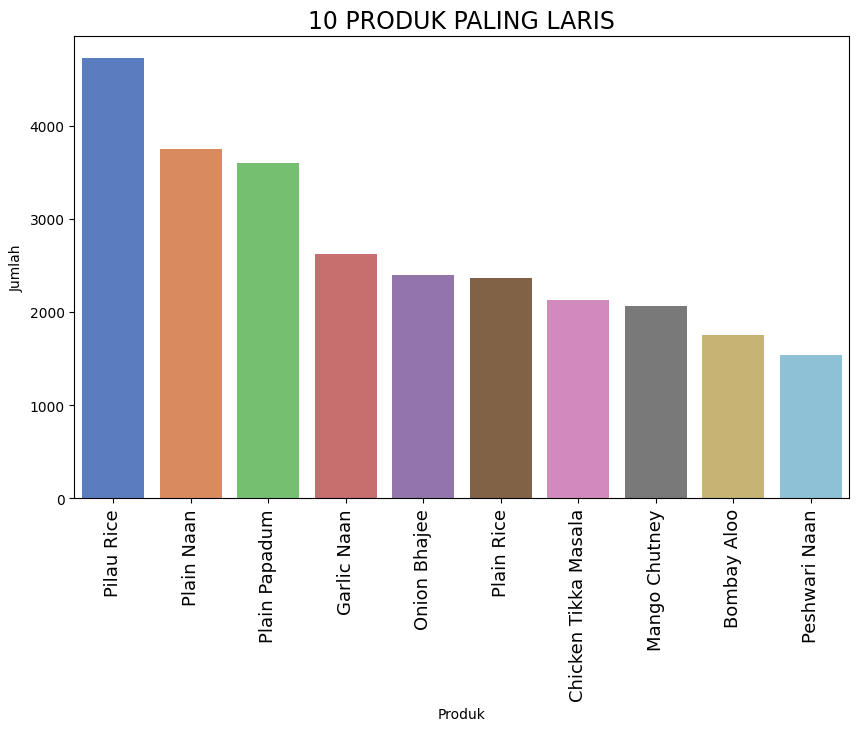

In [18]:
# MENAMPILKAN 10 PRODUK PALING LARIS

# Buat plot bar untuk item paling laris
plt.figure(figsize=(10, 6))
sns.set_palette("muted")

sns.barplot(x = data["Item Name"].value_counts()[:10].index,
            y = data["Item Name"].value_counts()[:10].values)
plt.xlabel("Produk"); plt.ylabel("Jumlah")
plt.xticks(size=13, rotation=90)
plt.title('10 PRODUK PALING LARIS', size=17)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


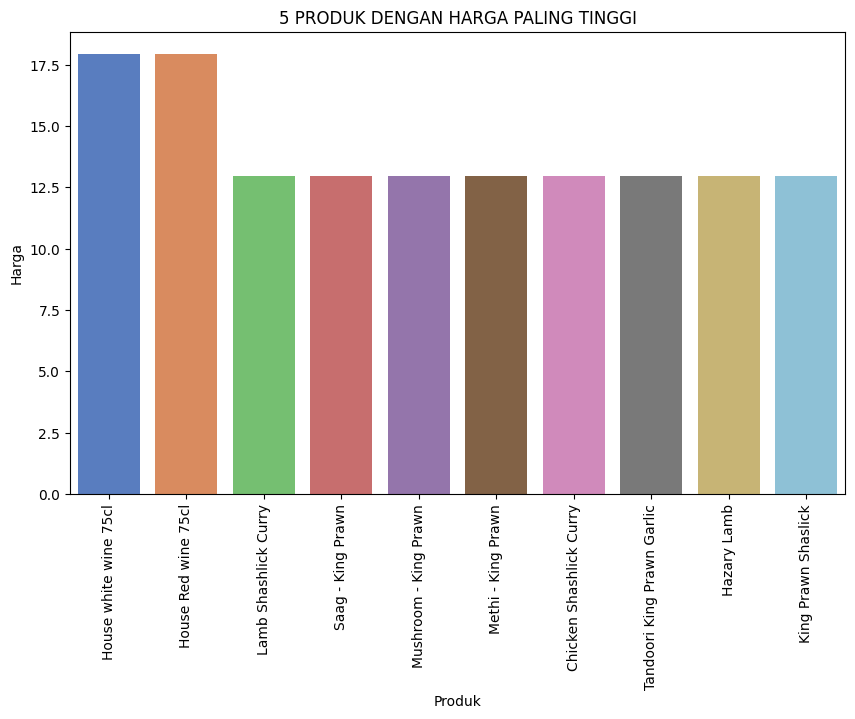

In [19]:
# MENAMPILKAN 10 HARGA PRODUK PALING TINGGI

# Buat dataframe produk dengan harga paling rendah
item_price_max = data.groupby("Item Name").agg({"Product Price": "max"}).sort_values("Product Price", ascending=False).head(10)

# Buat plot bar produk dengan harga paling rendah
plt.figure(figsize=(10, 6))
sns.barplot(
    x = item_price_max.index,
    y = item_price_max["Product Price"])
plt.title("5 PRODUK DENGAN HARGA PALING TINGGI")
plt.xlabel("Produk")
plt.ylabel("Harga")
plt.xticks(size=10, rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


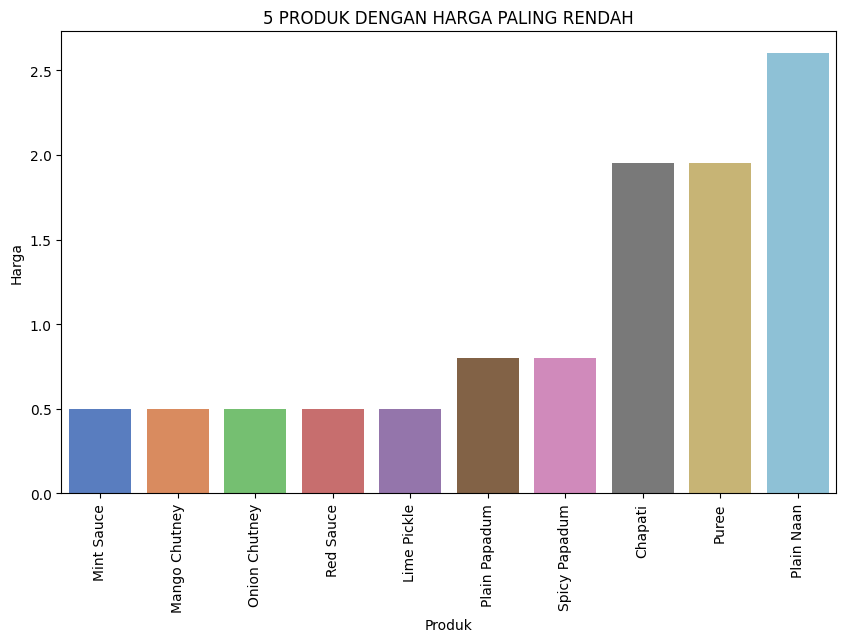

In [20]:
# MENAMPILKAN 10 HARGA PRODUK PALING RENDAH

# Buat dataframe produk dengan harga paling rendah
item_price_min = data.groupby("Item Name").agg({"Product Price": "min"}).sort_values("Product Price", ascending=True).head(10)

# Buat plot bar produk dengan harga paling rendah
plt.figure(figsize=(10, 6))
sns.barplot(
    x = item_price_min.index,
    y = item_price_min["Product Price"])
plt.title("5 PRODUK DENGAN HARGA PALING RENDAH")
plt.xlabel("Produk")
plt.ylabel("Harga")
plt.xticks(size=10, rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'JUMLAH TRANSAKSI PERBULAN')

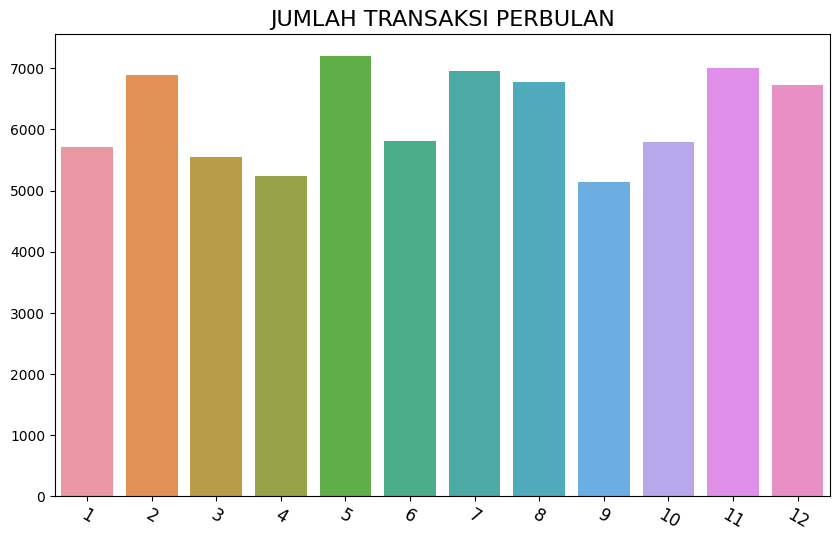

In [21]:
# MENAMPILKAN BANYAKNYA TRANSAKSI PER BULAN

# Buat dataframe transaksi perbulannya
data_perbulan = data.groupby('month')['Order Number'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

# Buat plot bar transaksi perbulannya
plt.figure(figsize= (10, 6))
sns.barplot(
    x = data["month"].value_counts()[:15].index,
    y = data_perbulan.values)
plt.xticks(size = 12, rotation = -30)
plt.title("JUMLAH TRANSAKSI PERBULAN", size = 16)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


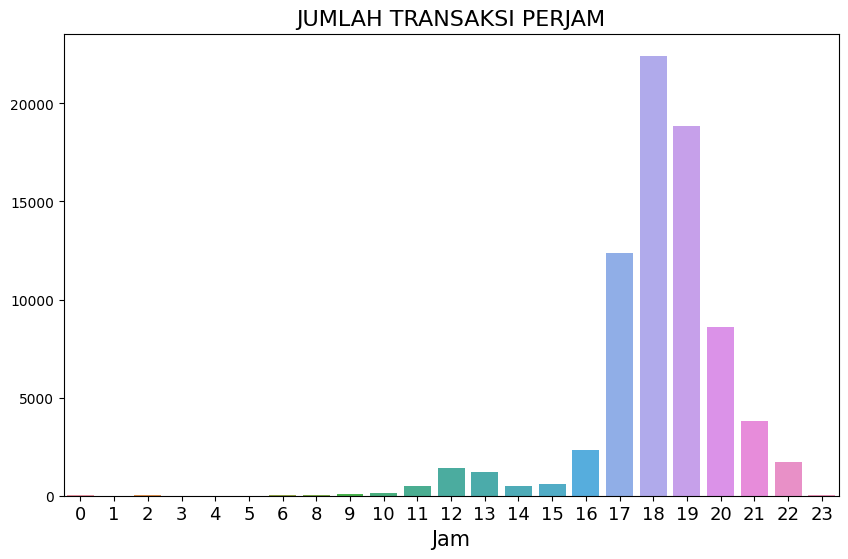

In [22]:
# MENAMPILKAN BANYAKNYA TRANSAKSI PER JAM

# Buat dataframe transaksi perjamnya
data_perhour = data.groupby('hour')['Order Number'].count()

# Buat plot bar transaksi perjamnya
plt.figure(figsize=(10, 6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values)
plt.xlabel('Jam', size=15)
plt.title("JUMLAH TRANSAKSI PERJAM", size = 16)
plt.xticks(size = 13)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


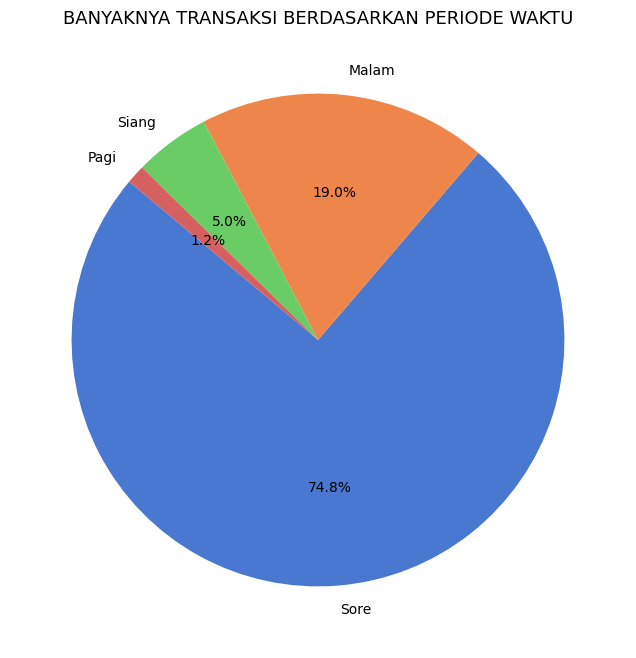

In [23]:
# MENAMPILKAN BANYAKNYA TRANSAKSI BERDASARKAN PERIODE WAKTU

# Buat dataframe transaksi berdarkan periode waktunya
periode_waktu_count = data['periode_waktu'].value_counts()

# Buat plot bar transaksi periode waktunya
plt.figure(figsize=(10, 8))
plt.title("BANYAKNYA TRANSAKSI BERDASARKAN PERIODE WAKTU", size = 13)
plt.pie(periode_waktu_count, labels=periode_waktu_count.index, autopct='%1.1f%%', startangle=140)
plt.show()

## **Data Preparation**

In [24]:
# Mengubah semua teks pada kolom "Item Name" menjadi huruf kecil
data["Item Name"] = data["Item Name"].apply(lambda item: item.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Menghapus spasi kosong pada kolom "Item Name"
data["Item Name"] = data["Item Name"].apply(lambda item: item.strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Membuat dataframe baru bernama yang berisi tiga kolom
item_count = data[["Order Number", "Item Name", "Quantity"]]

# Menampilkan 10 baris teratas dari dataframe "item_count"
item_count.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order Number,Item Name,Quantity
0,16118,plain papadum,2
1,16118,king prawn balti,1
2,16118,garlic naan,1
3,16118,mushroom rice,1
4,16118,paneer tikka masala,1
5,16118,mango chutney,1
6,16117,plain naan,1
7,16117,mushroom rice,1
8,16117,tandoori chicken (1/4),1
9,16117,vindaloo - lamb,1


In [27]:
# Membuat pivot table dari dataframe "item_count"
item_count_pivot = item_count.pivot_table(index='Order Number', columns='Item Name', values='Quantity', aggfunc=sum).fillna(0)

# Menampilkan ukuran pivot table
print("Ukuran Dataset :",item_count_pivot.shape)

# Menampilkan 5 baris teratas pivot table:
item_count_pivot.head()

Ukuran Dataset : (13397, 248)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item Name,aloo chaat,aloo gobi,aloo methi,baingan hari mirch,bengal fish biryani,bengal fish karahi,bengal fry fish,bengal king prawn,bengal salad,bhindi bhajee,...,vegetable rice,vegetable roll,vegetable samosa,vindaloo,vindaloo - chicken,vindaloo - chicken tikka,vindaloo - king prawn,vindaloo - lamb,vindaloo - prawn,vindaloo sauce
Order Number,,,,,,,,,,,,,,,,,,,,,
630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#  Mengubah tipe data dalam pivot table "item_count_pivot"
item_count_pivot = item_count_pivot.astype("int32")

# Menampilkan 5 baris teratas pivot table
item_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item Name,aloo chaat,aloo gobi,aloo methi,baingan hari mirch,bengal fish biryani,bengal fish karahi,bengal fry fish,bengal king prawn,bengal salad,bhindi bhajee,...,vegetable rice,vegetable roll,vegetable samosa,vindaloo,vindaloo - chicken,vindaloo - chicken tikka,vindaloo - king prawn,vindaloo - lamb,vindaloo - prawn,vindaloo sauce
Order Number,,,,,,,,,,,,,,,,,,,,,
630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Encoding data --- misalkan ada transaksi dengan jumlah pembelian 10 produk maka dihitungkan akan tetap 1, jika tdk ada maka 0
def encode_units(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1

item_count_pivot = item_count_pivot.applymap(encode_units)

# Menampilkan 5 baris teratas pivot table
item_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item Name,aloo chaat,aloo gobi,aloo methi,baingan hari mirch,bengal fish biryani,bengal fish karahi,bengal fry fish,bengal king prawn,bengal salad,bhindi bhajee,...,vegetable rice,vegetable roll,vegetable samosa,vindaloo,vindaloo - chicken,vindaloo - chicken tikka,vindaloo - king prawn,vindaloo - lamb,vindaloo - prawn,vindaloo sauce
Order Number,,,,,,,,,,,,,,,,,,,,,
630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print("Ukuran Dataset : ", item_count_pivot.shape)          # Menampilkan ukuran dataset
print("Jumlah Transaksi :", item_count_pivot.shape[0])      # Menampilkan jumlah transaksi
print("Jumlah Item : ", item_count_pivot.shape[1])          # Menampilkan jumlah item

Ukuran Dataset :  (13397, 248)
Jumlah Transaksi : 13397
Jumlah Item :  248


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Modeling - Algoritma Apriori**

In [31]:
# ALGORITMA APRIORI
support = 0.03  # Nilai minimum support
frq_items = apriori(item_count_pivot, min_support = support, use_colnames = True)   # Menerapkan algoritma Apriori
frq_items.sort_values("support", ascending=False).head(15)  # Menampilkan 15 frequent itemset teratas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
28,0.352392,(pilau rice)
29,0.280063,(plain naan)
30,0.268418,(plain papadum)
13,0.196163,(garlic naan)
25,0.179219,(onion bhajee)
31,0.176831,(plain rice)
10,0.159215,(chicken tikka masala)
20,0.154438,(mango chutney)
89,0.133239,"(pilau rice, plain papadum)"
2,0.130776,(bombay aloo)


In [32]:
# Menghasilkan association rules dari frequent itemset
metric = "lift"     # Menentukan metrik evaluasi
min_threshold = 1   # Nilai minimum threshold

# Menghasilkan aturan asosiasi
rules = association_rules(frq_items, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]

# Mengurutkan rules (aturan) berdasarkan confidence
rules.sort_values('confidence', ascending=False, inplace=True)

# Menampilkan 15 rules teratas
rules.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
148,"(onion chutney, mint sauce)",(plain papadum),0.031126,0.868750,3.236553
118,"(mango chutney, mint sauce)",(plain papadum),0.046503,0.865278,3.223617
130,"(mango chutney, onion chutney)",(plain papadum),0.036799,0.842735,3.139633
154,"(pilau rice, mint sauce)",(plain papadum),0.038367,0.826367,3.078652
136,"(mango chutney, pilau rice)",(plain papadum),0.058147,0.790863,2.946382
102,(red sauce),(plain papadum),0.037844,0.762406,2.840365
84,(onion chutney),(plain papadum),0.058297,0.756783,2.819416
70,(mint sauce),(plain papadum),0.080839,0.740260,2.757859
124,"(mango chutney, onion bhajee)",(plain papadum),0.030305,0.736842,2.745126
60,(mango chutney),(plain papadum),0.113010,0.731754,2.726172


## **Visualisasi Hasil Modeling**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


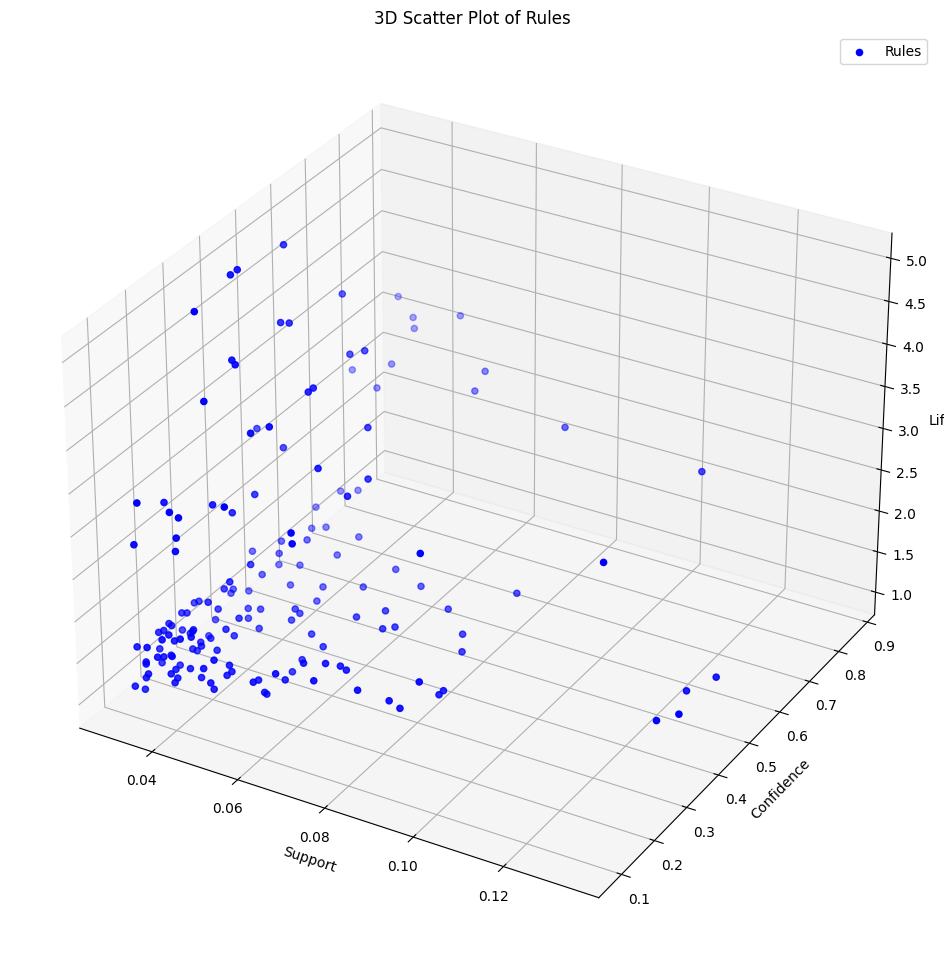

In [35]:
# Membuat plot untuk memvisualisasikan hubungan antara nilai "support", "confidence", dan "lift"
support = rules["support"]
confidence = rules["confidence"]
lift = rules["lift"]

fig = plt.figure(figsize=(23, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support, confidence, lift, c='b', marker='o', s=20, label='Rules')

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')

ax.set_title('3D Scatter Plot of Rules')

ax.grid(True, linestyle='--', alpha=0.6)

ax.legend(loc='upper right')

plt.show()

In [36]:
rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)
# Buat sunburst chart
fig = px.sunburst(rules, path=['rule'], values='lift',
                  title='Market Basket Analysis - Sunburst Chart',
                  color='support', color_continuous_scale='YlGnBu')
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    )

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

# Buat plot
fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 color="lift", hover_name="consequents",
                 title='Market Basket Analysis - Support vs. Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence'})

fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    coloraxis_colorbar_title='Lift',
    showlegend=True
    )
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

